## Objective- t-SNE visualization of Amazon reviews with polarity based color-coding

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [1]:
!pip install gensim 
!pip install nltk
!pip install seaborn

    100% |################################| 22.9MB 3.4MB/s 
    100% |################################| 1.4MB 18.5MB/s 
    100% |################################| 133kB 36.5MB/s 
    100% |################################| 4.6MB 12.2MB/s 
    100% |################################| 61kB 23.1MB/s 
    100% |################################| 552kB 23.9MB/s 
  Running setup.py bdist_wheel for gensim ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/26/7b/c6/8f29903415a88fc8c9fb99c6c027684d5ce7e6da98cf71a5b9
  Running setup.py bdist_wheel for smart-open ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/73/f1/9b/ccf93d4ba073b6f79b1ed9df68ab5ce048d8136d0efcf90b30
  Running setup.py bdist_wheel for bz2file ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built gensim smart-open bz2file
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgradi

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import string
import seaborn as sns

## Loading the data 

In [4]:
sql_data=sqlite3.connect('database.sqlite')#getting sql data

In [5]:
data=pd.read_sql_query("""SELECT *
FROM REVIEWS
WHERE score!=3""",sql_data)

In [6]:
data.columns   #columns name

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
def pos_neg(score):   #function to change score's int value to negative or positive
    if score<3:
        return 'negative'
    else:
        return 'positive'

actual_score=data['Score']
data['Score']=actual_score.map(pos_neg)

In [8]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


## Data Cleaning

In [9]:
data=data[data['HelpfulnessNumerator']<=data['HelpfulnessDenominator']]   #part of data cleaning

In [10]:
data['Id'].size   #getting total number of points

525812

In [11]:
#removing duplication of entries
data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep='first',inplace=True)   #dropping the dupicates from data corpus
data.shape

(364171, 10)

## Text Preprocessing: Stemming, stop-word removal and Lemmatization.
 
In the Preprocessing phase we do the following in the order below:-

1. Begin by removing the html tags
2. Remove any punctuations or limited set of special characters like , or . or # etc.
3. Check if the word is made up of english letters and is not alpha-numeric
4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
5. Convert the word to lowercase
6. Remove Stopwords
7. Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)


In [12]:
import nltk
from nltk.corpus import stopwords

stop=set(stopwords.words('english'))   #stopwords of english language
#stop

In [13]:
import re
sno=nltk.stem.SnowballStemmer('english')

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [14]:
#taking sample of data
sample_data=data.sample(5000)
sample_score=sample_data['Score']

In [15]:
final_string=[]
s=''
for sentence in sample_data['Text']:
    filtered_sentence=[]
    cleaned_sentence=cleanhtml(sentence)
    for words in sentence.split():
        cleaned_words=cleanpunc(words)
        if ( (cleaned_words.isalpha()) & (len(cleaned_words)>2) ):
            if(cleaned_words.lower() not in stop):
                s=(sno.stem(cleaned_words.lower())).encode('utf8')
                filtered_sentence.append(s)
            else: 
                continue
        else:
            continue
    str1=b" ".join(filtered_sentence)    
    final_string.append(str1)
        

In [16]:
sample_data['Cleaned_text']=final_string

In [17]:
sample_data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_text
440377,476208,B0006NLXKM,AUA50Q5GKFKOU,E. Haupt,0,0,positive,1319241600,Beef roll,We bought it because of a recommendation from ...,b'bought recommend tri dog love great product ...
453496,490307,B001E5DZJ8,A2ZE5ICI6LWAZ0,"Debra Schiff ""http://hereandthere123.blogspot...",3,3,positive,1259193600,Excellent ingredient for many recipes,I use this bouillon when I make rice to flavor...,b'use bouillon make rice flavor salt bit salti...
297683,322459,B0016CMVY4,A23HBQ3ILAEY2,HungryGuy,2,2,positive,1278979200,Tasty and filling,"Surprisingly tasty and filling. Low calorie, h...",b'surpris tasti low qualiti good price conveni...


## 1. Bag Of Words (BoW)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
count_vec=CountVectorizer()
final_count=count_vec.fit_transform(sample_data['Cleaned_text'].values)

In [21]:
final_count.shape

(5000, 8476)

In [22]:
type(final_count)

scipy.sparse.csr.csr_matrix

In [23]:
final_count=final_count.toarray()

In [25]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
final_count=s.fit_transform(final_count)

/opt/conda/envs/py3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
from sklearn.manifold import TSNE

#### 1.1 perplexity=100, n_iter=1000

In [27]:
tsne=TSNE(n_iter=1000,n_components=2,perplexity=100,random_state=0)
tsne_data=tsne.fit_transform(final_count)

In [28]:
tsne_data=np.vstack((tsne_data.T,sample_score)).T


In [29]:
tsne_df=pd.DataFrame(tsne_data,columns=('Dim1','Dim2',"label"))
#tsne_data

<function matplotlib.pyplot.plot(*args, **kwargs)>

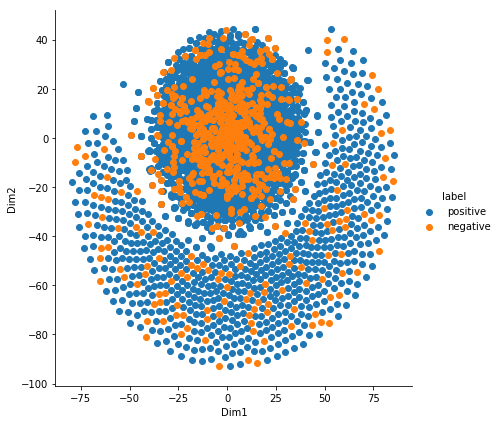

In [30]:
sns.FacetGrid(tsne_df,hue='label',height=6).map(plt.scatter,'Dim1','Dim2').add_legend()
plt.plot

##### Observation- it is like pac man eating moon structure

#### 1.2 perplexity=10, n_iter=1000 

In [31]:
tsne=TSNE(n_iter=1000,n_components=2,perplexity=10,random_state=0)
tsne_data=tsne.fit_transform(final_count)

In [32]:
tsne_data=np.vstack((tsne_data.T,sample_score)).T
tsne_df=pd.DataFrame(tsne_data,columns=('Dim1','Dim2',"label"))

<function matplotlib.pyplot.plot(*args, **kwargs)>

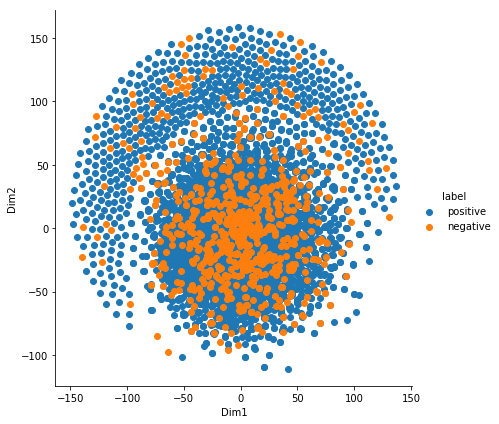

In [33]:
sns.FacetGrid(tsne_df,hue='label',height=6).map(plt.scatter,'Dim1','Dim2').add_legend()
plt.plot

#### 1.3 perplexity=1, n_iter=1000 

In [41]:
tsne=TSNE(n_iter=1000,n_components=2,perplexity=1,random_state=0)
tsne_data=tsne.fit_transform(final_count)

In [42]:
tsne_data=np.vstack((tsne_data.T,sample_score)).T
tsne_df=pd.DataFrame(tsne_data,columns=('Dim1','Dim2',"label"))

<function matplotlib.pyplot.plot(*args, **kwargs)>

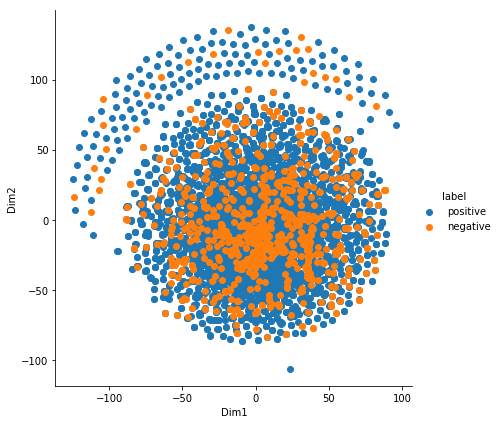

In [44]:
sns.FacetGrid(tsne_df,hue='label',height=6).map(plt.scatter,'Dim1','Dim2').add_legend()
plt.plot

##### Observation- when we decrease perplexity the 'pac man' existance is in danger , only moon remaining , that means we can say the moon getting sparse as we decrease perplexity and keeping iter constant

#### 1.4 perplexity=100, n_iter=500 

In [46]:
tsne=TSNE(n_iter=500,n_components=2,perplexity=100,random_state=0)
tsne_data=tsne.fit_transform(final_count)

In [47]:
tsne_data=np.vstack((tsne_data.T,sample_score)).T
tsne_df=pd.DataFrame(tsne_data,columns=('Dim1','Dim2',"label"))

<function matplotlib.pyplot.plot(*args, **kwargs)>

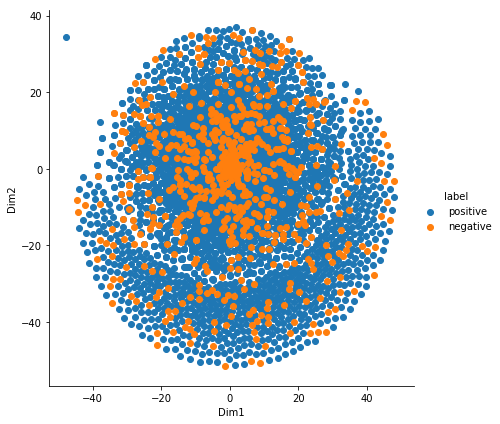

In [48]:
sns.FacetGrid(tsne_df,hue='label',height=6).map(plt.scatter,'Dim1','Dim2').add_legend()
plt.plot

#### 1.5 perplexity=100, n_iter=250 

In [49]:
tsne=TSNE(n_iter=250,n_components=2,perplexity=100,random_state=0)
tsne_data=tsne.fit_transform(final_count)

In [50]:
tsne_data=np.vstack((tsne_data.T,sample_score)).T
tsne_df=pd.DataFrame(tsne_data,columns=('Dim1','Dim2',"label"))

<function matplotlib.pyplot.plot(*args, **kwargs)>

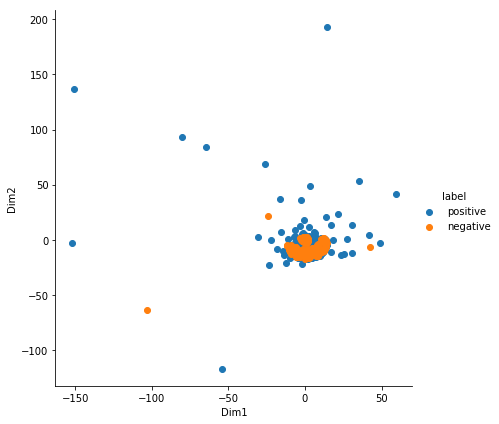

In [51]:
sns.FacetGrid(tsne_df,hue='label',height=6, aspect=1).map(plt.scatter,'Dim1','Dim2').add_legend()
plt.plot

##### Observation- here decreasing iter causes  increasing density

## 2. TF-IDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf=TfidfVectorizer(ngram_range=(1,1))   #unigram
final_count=tfidf.fit_transform(sample_data['Cleaned_text'].values)

/opt/conda/envs/py3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [20]:
final_count.shape

(5000, 8611)

In [21]:
type(final_count)

scipy.sparse.csr.csr_matrix

In [22]:
len(tfidf.get_feature_names())

8611

In [23]:
final_count=final_count.toarray()#converting sparse to dense matrix

In [25]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
final_count=s.fit_transform(final_count)

#### 2.1 perplexity=100, n_iter=1000

In [59]:
model=TSNE(n_components=2,random_state=0,perplexity=100, n_iter=1000)
tsne_data=model.fit_transform(final_count)

/opt/conda/envs/py3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


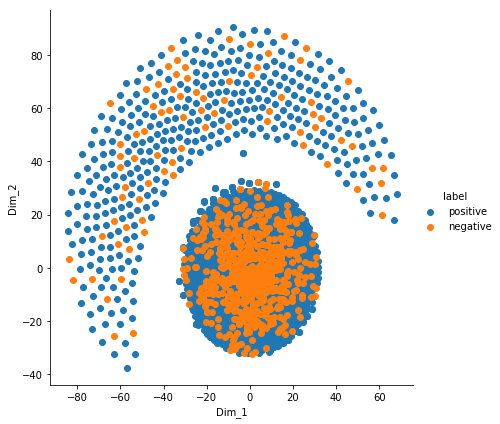

In [60]:
tsne_data = np.vstack((tsne_data.T,sample_score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))


sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

##### Observation- a ball like structure at the center

#### 2.2 perplexity=10, n_iter=1000

In [61]:
model=TSNE(n_components=2,random_state=0,perplexity=10, n_iter=1000)
tsne_data=model.fit_transform(final_count)

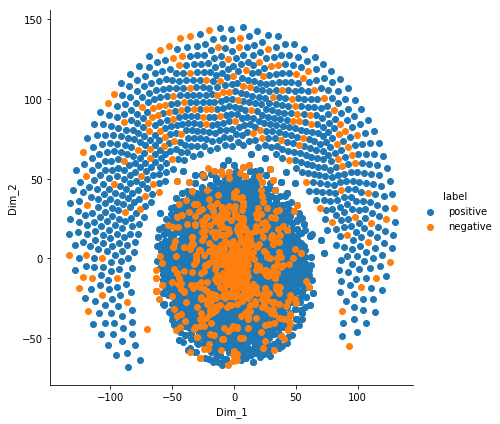

In [62]:
tsne_data = np.vstack((tsne_data.T,sample_score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))


sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

#### 2.3 perplexity=1, n_iter=1000

In [63]:
model=TSNE(n_components=2,random_state=0,perplexity=1, n_iter=1000)
tsne_data=model.fit_transform(final_count)

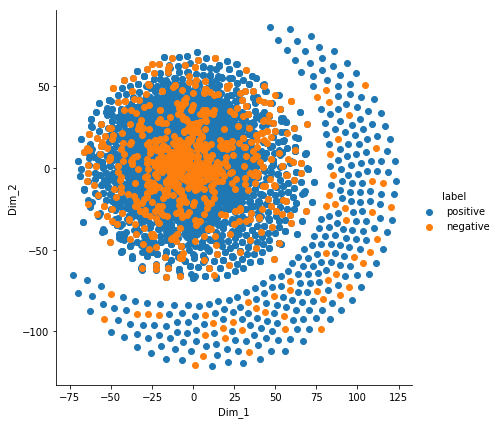

In [64]:
tsne_data = np.vstack((tsne_data.T,sample_score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))


sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

#### 2.4 perplexity=100, n_iter=500

In [65]:
model=TSNE(n_components=2,random_state=0,perplexity=100, n_iter=500)
tsne_data=model.fit_transform(final_count)

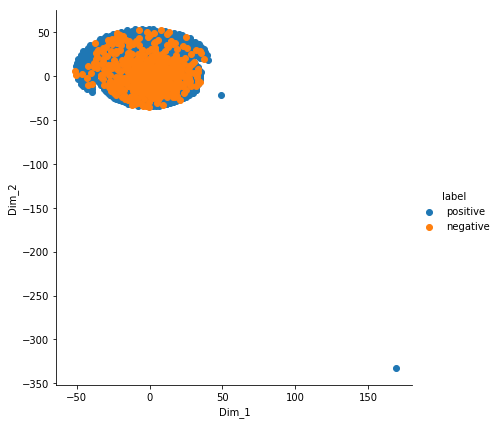

In [66]:
tsne_data = np.vstack((tsne_data.T,sample_score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))


sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

#### 2.5 perplexity=100, n_iter=250

In [28]:
model=TSNE(n_components=2,random_state=0,perplexity=100, n_iter=250)
tsne_data=model.fit_transform(final_count)

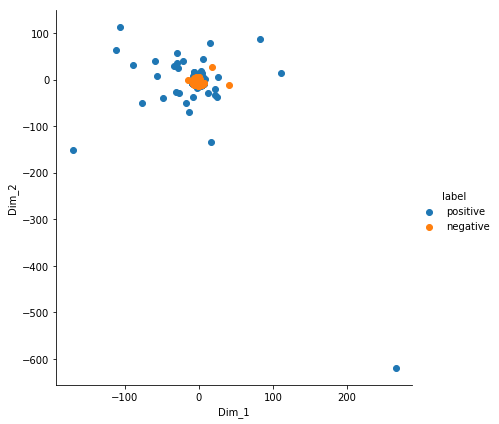

In [29]:
tsne_data = np.vstack((tsne_data.T,sample_score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))


sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

## 3. Avg word2vec

In [30]:
# finding the list of sentences in the sample data
import gensim
list_of_sentences=[]
for sent in sample_data['Cleaned_text'].values:
    filtered_sentence=[]
    for w in sent.split():
        w=w.decode("utf-8") 
        filtered_sentence.append(w.lower())
    list_of_sentences.append(filtered_sentence)

In [32]:
w2v_model=gensim.models.Word2Vec(list_of_sentences,min_count=5,size=50, workers=4)    

In [33]:
words=list(w2v_model.wv.vocab)
print(len(words))

2877


In [34]:
#calculating avg w2vec
vectors=[];
for sentence in list_of_sentences:
    sentence_vector=np.zeros(50)
    count_vec=0;
    for word in sentence:
        try:
            vec=w2v_model.wv[word]
            sentence_vector+=vec
            count_vec+=1;
        except:
            pass
    sentence_vector/=count_vec
    vectors.append(sentence_vector)
        

/opt/conda/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [37]:
nan=list(set(np.argwhere(np.isnan(vectors))[0])) #checking that any NaN value present in sent_vectors

In [40]:
vectors=np.delete(vectors, nan, axis=0)
#sample_score=np.array(sample_score)
sample_score=np.delete(sample_score, nan, axis=0)

#### 3.1 perplexity=30, n_iter=1000

In [44]:
s=StandardScaler()
vectors=s.fit_transform(vectors)

In [45]:
model=TSNE(n_components=2,random_state=1,perplexity=30,n_iter=1000)
tsne_data=model.fit_transform(vectors)

In [46]:
tsne_data = np.vstack((tsne_data.T,sample_score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

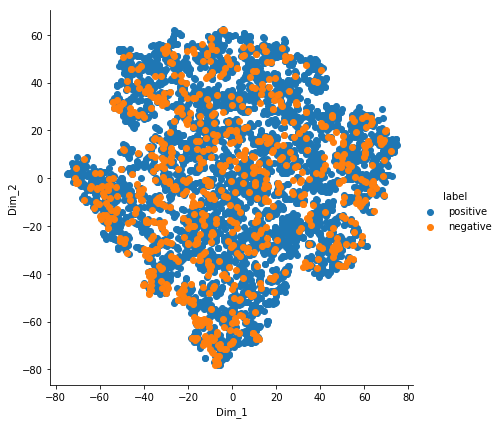

In [47]:
sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

#### 3.2 perplexity=100, n_iter=1000

In [51]:
model=TSNE(n_components=2,random_state=1,perplexity=100,n_iter=1000)
tsne_data=model.fit_transform(vectors)

In [52]:
tsne_data = np.vstack((tsne_data.T,sample_score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

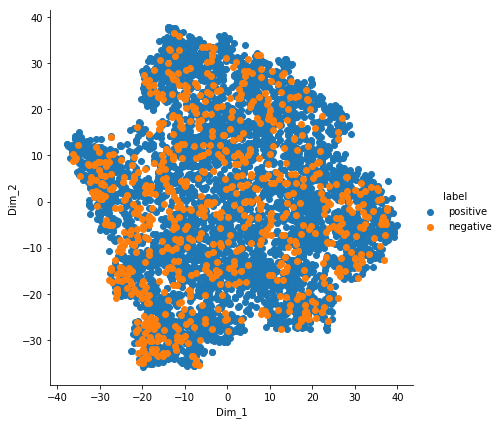

In [53]:
sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

#### 3.2 perplexity=1, n_iter=1000

In [57]:
model=TSNE(n_components=2,random_state=1,perplexity=1,n_iter=1000)
tsne_data=model.fit_transform(vectors)

In [ ]:
tsne_data = np.vstack((tsne_data.T,sample_score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

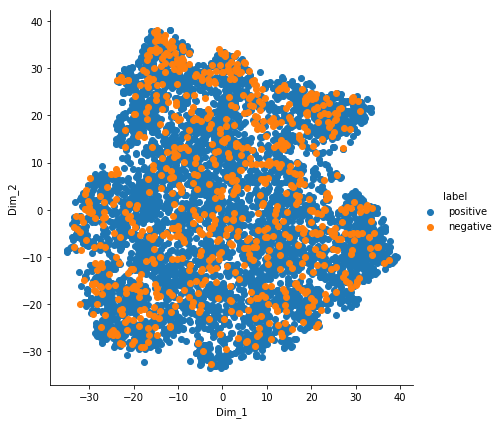

In [58]:
sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

#### 3.4 perplexity=100, n_iter=250

In [59]:
model=TSNE(n_components=2,random_state=0,perplexity=100,n_iter=250)
tsne_data=model.fit_transform(vectors)

In [60]:
tsne_data = np.vstack((tsne_data.T,sample_score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

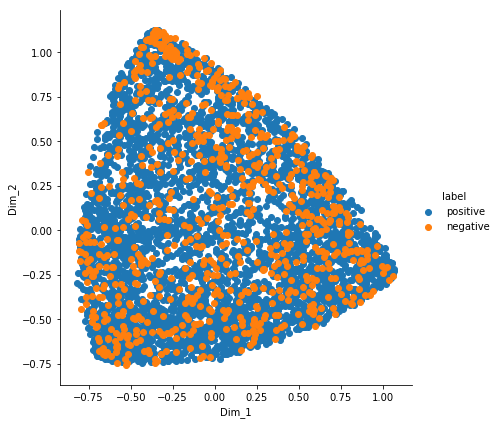

In [61]:
sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

##### Observation - getting a nice shape

#### 3.5 perplexity=10, n_iter=250

In [62]:
model=TSNE(n_components=2,random_state=0,perplexity=10,n_iter=250)
tsne_data=model.fit_transform(vectors)

In [63]:
tsne_data = np.vstack((tsne_data.T,sample_score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

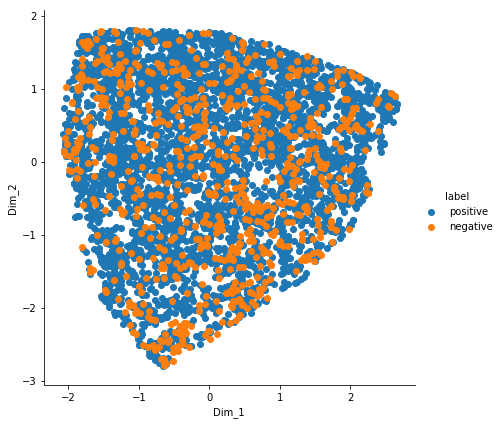

In [64]:
sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

#### 3.6 perplexity=1, n_iter=250

In [65]:
model=TSNE(n_components=2,random_state=0,perplexity=1,n_iter=250)
tsne_data=model.fit_transform(vectors)

In [66]:
tsne_data = np.vstack((tsne_data.T,sample_score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

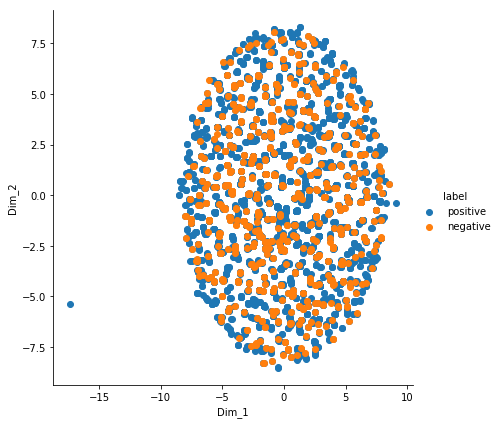

In [67]:
sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

## 4. TF-IDF word2vector

In [68]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,1))
final_tf_idf = tf_idf_vect.fit_transform(sample_data['Cleaned_text'].values)

/opt/conda/envs/py3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [69]:
features=tf_idf_vect.get_feature_names()
len(features)
#features

8611

In [70]:
#calculating tf-idf w2vec
tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sentences: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = final_tf_idf[row, features.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

/opt/conda/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [76]:
nan=np.argwhere(np.isnan(tfidf_sent_vectors))
tfidf_sent_vectors=np.delete(tfidf_sent_vectors, nan, axis=0)

In [75]:
sample_score=sample_data['Score']
sample_score=np.array(sample_score)

In [77]:
sample_score=np.delete(sample_score, nan, axis=0)

#### 4.1 perplexity=1, n_iter=250

In [78]:
model=TSNE(n_components=2,random_state=0,perplexity=1,n_iter=250)
tsne_data=model.fit_transform(tfidf_sent_vectors)

/opt/conda/envs/py3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


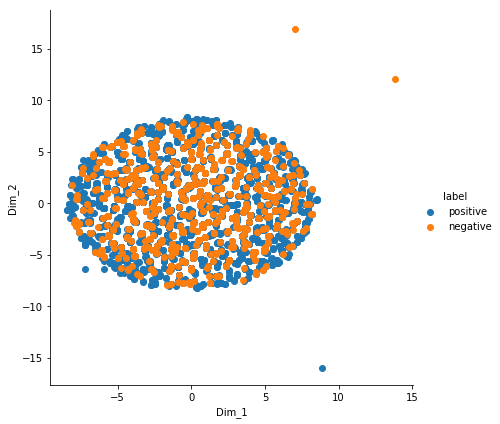

In [79]:
tsne_data = np.vstack((tsne_data.T,sample_score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))


sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

#### 4.2 perplexity=1, n_iter=1000

In [80]:
model=TSNE(n_components=2,random_state=0,perplexity=1,n_iter=1000)
tsne_data=model.fit_transform(tfidf_sent_vectors)

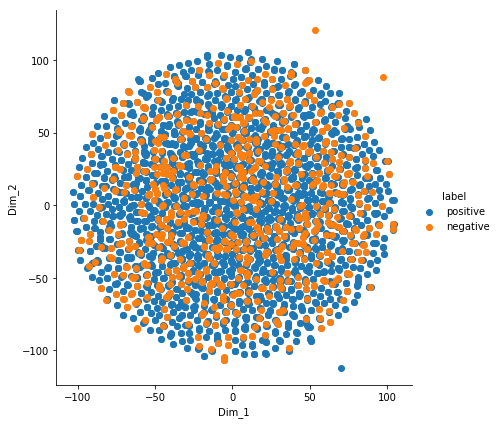

In [81]:
tsne_data = np.vstack((tsne_data.T,sample_score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))


sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

##### Observation- a sun like structure

#### 4.3 perplexity=1, n_iter=2000

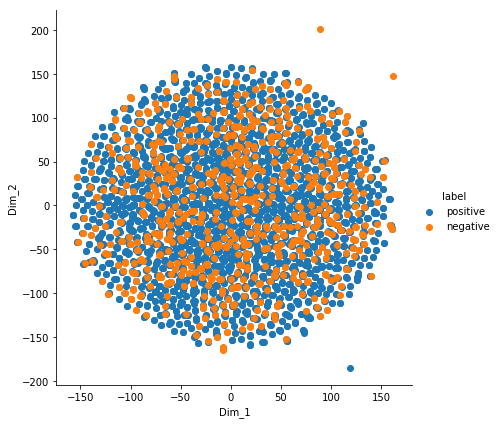

In [83]:
model=TSNE(n_components=2,random_state=0,perplexity=1,n_iter=2000)
tsne_data=model.fit_transform(tfidf_sent_vectors)

tsne_data = np.vstack((tsne_data.T,sample_score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))


sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

#### 4.4 perplexity=10, n_iter=250

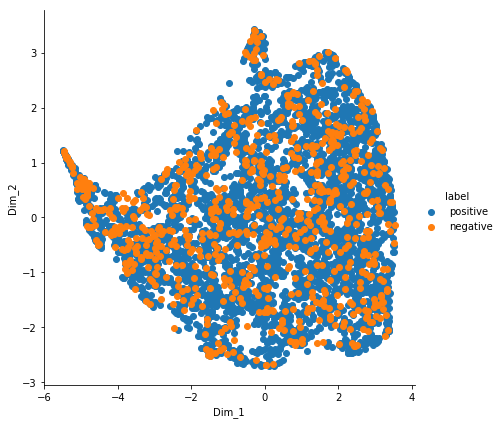

In [84]:
model=TSNE(n_components=2,random_state=0,perplexity=10,n_iter=250)
tsne_data=model.fit_transform(tfidf_sent_vectors)

tsne_data = np.vstack((tsne_data.T,sample_score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))


sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

#### 4.5 perplexity=10, n_iter=1000

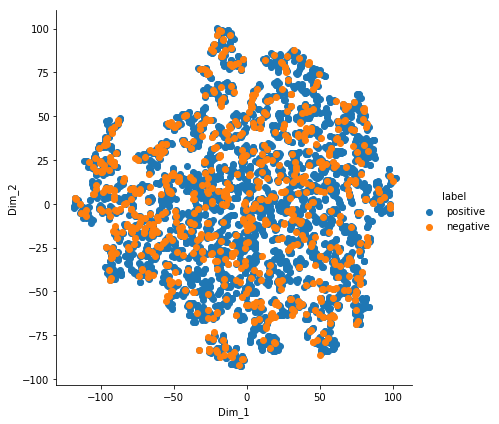

In [85]:
model=TSNE(n_components=2,random_state=0,perplexity=10,n_iter=1000)
tsne_data=model.fit_transform(tfidf_sent_vectors)

tsne_data = np.vstack((tsne_data.T,sample_score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))


sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

#### 4.6 perplexity=100, n_iter=250

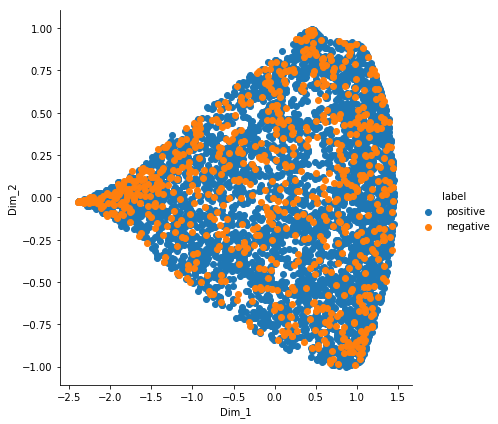

In [86]:
model=TSNE(n_components=2,random_state=0,perplexity=100,n_iter=250)
tsne_data=model.fit_transform(tfidf_sent_vectors)

tsne_data = np.vstack((tsne_data.T,sample_score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))


sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

#### 4.7 perplexity=100, n_iter=500

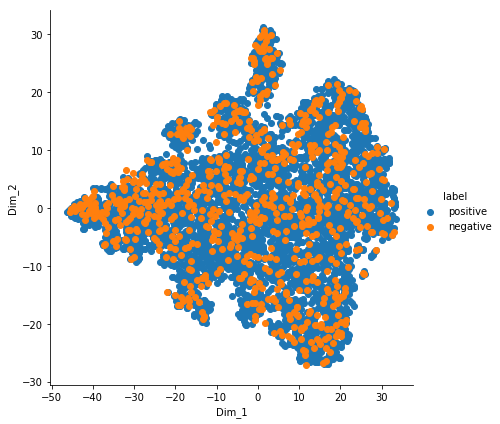

In [89]:
model=TSNE(n_components=2,random_state=0,perplexity=100,n_iter=500)
tsne_data=model.fit_transform(tfidf_sent_vectors)

tsne_data = np.vstack((tsne_data.T,sample_score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))


sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

#### 4.8 perplexity=100, n_iter=1000

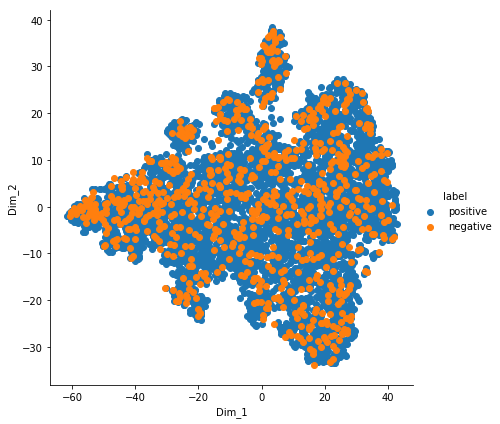

In [88]:
model=TSNE(n_components=2,random_state=0,perplexity=100,n_iter=1000)
tsne_data=model.fit_transform(tfidf_sent_vectors)

tsne_data = np.vstack((tsne_data.T,sample_score)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))


sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()